In [3]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [5]:
# Define input data for the AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

In [7]:
# Build the model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))  
model.add(Dense(1, activation='sigmoid'))

C:\Users\jayaraman\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Train the model
history = model.fit(X, y, epochs=100, batch_size=4, verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7780
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.5000 - loss: 0.7764
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5000 - loss: 0.7749
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5000 - loss: 0.7735
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5000 - loss: 0.7720
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5000 - loss: 0.7706
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5000 - loss: 0.7692
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5000 - loss: 0.7677
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5000 - loss: 0.7663
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5000 - loss: 0.7649
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5000 - loss: 0.7634
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5000 - los

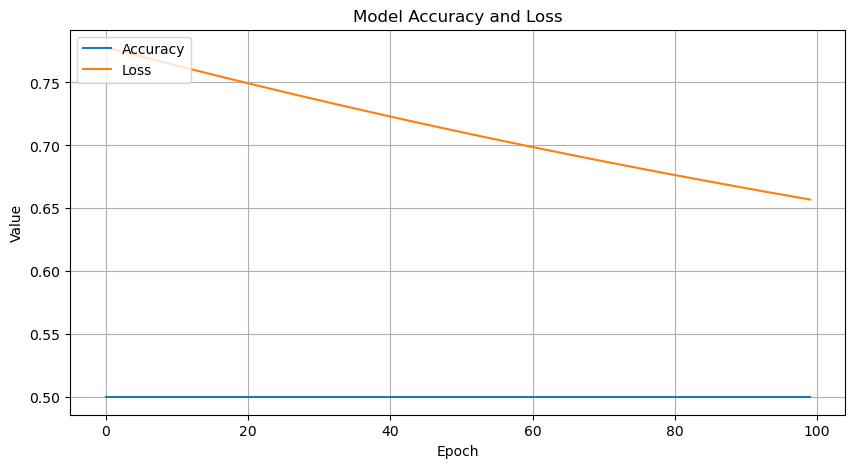

In [13]:
# Plot the training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.grid(True)
plt.show()

In [15]:
# Evaluate the model
loss, accuracy = model.evaluate(X, y, verbose=0)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

Loss: 0.6560, Accuracy: 0.5000


In [17]:
predictions = model.predict(X)
print("Predictions on training data:")
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Predictions on training data:
[[0.45468077]
 [0.5600624 ]
 [0.5748106 ]
 [0.7108084 ]]


In [19]:
# Convert predictions to binary (0 or 1)
binary_predictions = (predictions > 0.5).astype(int)
print("Binary Predictions on training data:")
print(binary_predictions)

Binary Predictions on training data:
[[0]
 [1]
 [1]
 [1]]


In [21]:
# Make a prediction for a specific input [0, 1]
single_prediction = model.predict(np.array([[0, 1]]))
binary_single_prediction = int(single_prediction > 0.5)
print(f"Prediction for input [0, 1]: {single_prediction[0][0]:.4f}, Binary Output: {binary_single_prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Prediction for input [0, 1]: 0.5601, Binary Output: 1


C:\Users\jayaraman\AppData\Local\Temp\ipykernel_9860\2550651135.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  binary_single_prediction = int(single_prediction > 0.5)


379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


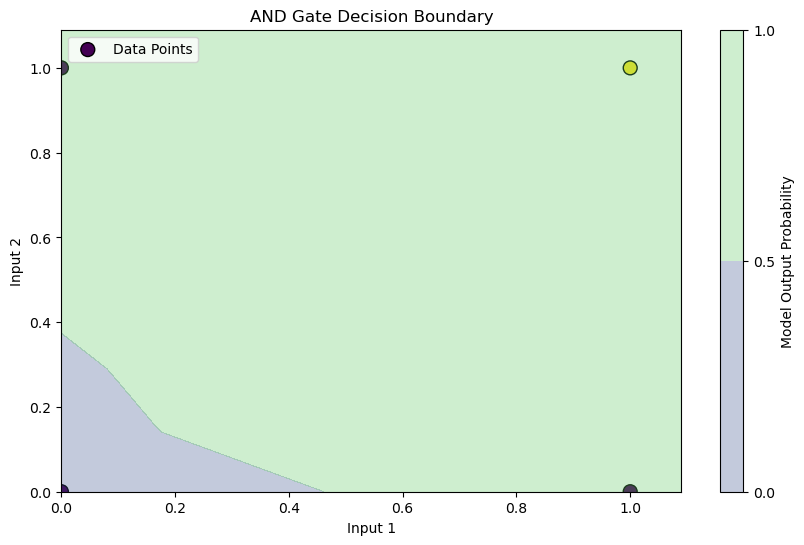

In [23]:
# Plotting the decision boundary
# Generate a grid of points to evaluate the model's predictions
xx, yy = np.meshgrid(np.arange(0, 1.1, 0.01), np.arange(0, 1.1, 0.01))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict the model's output for the grid points
pred_grid = model.predict(grid).reshape(xx.shape)

# Scatter plot of original data points
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=100, edgecolor='k', label='Data Points')
plt.title('AND Gate Decision Boundary')
plt.xlabel('Input 1')
plt.ylabel('Input 2')

# Contour plot for decision boundary
plt.contourf(xx, yy, pred_grid, levels=[0, 0.5, 1], alpha=0.3, cmap='viridis')
plt.colorbar(label='Model Output Probability')
plt.legend(loc='upper left')
plt.show()